# Overview
Extract data from a PDF using Poppler and Shapely. Rather than use Poppler's layout algorithms we develop a basic one in Python since this could be useful for tougher PDF's as we lay the groundwork for a menu spider scraper. 
  
We're going to scrape Gordon Ramsay's Steakhouse menu http://marketeammenuparisgordonramsaysteak.com

In [2]:
import pandas as pd
import requests
from IPython.core.display import HTML
resp=requests.get("http://marketeammenuparisgordonramsaysteak.com/")
print(resp.url)

http://marketeammenuparisgordonramsaysteak.com/


From the website let's first scrape the [dinner menu](http://marketeammenuparisgordonramsaysteak.com/GDSteak_Dinner.pdf) 

In [3]:
resp=requests.get("http://marketeammenuparisgordonramsaysteak.com/GDSteak_Dinner.pdf")
resp.content

b'%PDF-1.6\r%\xe2\xe3\xcf\xd3\r\n20 0 obj\r<</Linearized 1/L 78323/O 22/E 56526/N 3/T 77989/H [ 528 229]>>\rendobj\r                   \r49 0 obj\r<</DecodeParms<</Columns 4/Predictor 12>>/Filter/FlateDecode/ID[<E2D4E01E244EE1D7892BE5CF6DA37948><2B49CDECCE4848D98026502B898FFEAB>]/Index[20 52]/Info 19 0 R/Length 125/Prev 77990/Root 21 0 R/Size 72/Type/XRef/W[1 2 1]>>stream\r\nh\xdebbd\x10``b`z\n$\x18\xedAD\x13\x90`~\x08$\x04v\x02\tyE\x90\xac\x1d\x90\x10y\r\x92\xd8\x0c$\xa4\xba\x80\x04\xeb\x1e\x90\xc4\x1c \xc1\xa5\x06\xe2\xde\x03\x11\xc6 \xc2\x08H\xb0H\x80Xo@\xc4Z\x10a\x08$\xb8\'\x01\t\x86 \x90)\x0bAzm@\xac\xff +\xcdA\xac? \x96\x01\x90\xf0\xb9\xce\xc0\xc4\xc8\xb0\x04\xa4\x98\x81\x91\xd6\xc4\x7f\xa6\x1fo\x00\x02\x0c\x00Ge\x14|\rendstream\rendobj\rstartxref\r0\r%%EOF\r            \r71 0 obj\r<</Filter/FlateDecode/I 156/Length 149/S 79>>stream\r\nh\xdeb```f``\xf2g`e`\x90\xf0b\x10`@\x00\x01\x06\x16\xa0(\x0b\x03\xc7\x01\x96\x83\x01\xc2\xda\x0c\x0c\xab\x0c \x12<\xaa*O\x15\x0e+\xe69\x00\xd9\x8c

In [4]:
with open("temp.pdf", "wb+") as f:
    f.write(resp.content)

# Poppler
[Poppler](https://poppler.freedesktop.org/) has a great suite of pdf manipulation software. I'll be using a Python wrapper that calls Poppler for us without having to deal with running it as a binary.  
  
The API isn't well documented so this will be a good exercise working with poorly documented code. 

In [7]:
import poppler
from poppler import PageRenderer

#API isn't well documented but use https://github.com/cbrunet/python-poppler/blob/master/src/poppler/document.py
#and https://cbrunet.net/python-poppler/usage.html#quickstart
document=poppler.load_from_data(resp.content)
document

In [8]:
help(document)

Help on Document in module poppler.document object:

class Document(builtins.object)
 |  Document(poppler_document, data=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, poppler_document, data=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  create_destination_map(self)
 |  
 |  create_font_iterator(self, page=0)
 |  
 |  create_page(self, index)
 |  
 |  create_toc(self)
 |  
 |  embedded_files(self)
 |  
 |  fonts(self)
 |  
 |  has_embedded_files(self)
 |  
 |  has_permission(self, which)
 |  
 |  info_date(self, key)
 |  
 |  info_key(self, key)
 |  
 |  info_keys(self)
 |  
 |  infos(self)
 |      Get the document info dictionary as a dict object.
 |  
 |  is_encrypted(self)
 |  
 |  is_linearized(self)
 |  
 |  is_locked(self)
 |  
 |  remove_info(self)
 |  
 |  save(self, file_name)
 |  
 |  save_a_copy(self, file_name)
 |  
 |  set_info_date(self, key, val)
 |  
 |  set_info_key(self, key, val)
 |  
 |  unlock(self, owner_passwor

In [20]:
[x.name for x in document.fonts()]

['UGDKZY+MinionPro-Regular',
 'AAAAAC+Cambria-Bold',
 'AAAAAE+Cambria',
 'AAAAAG+Cambria',
 'AAAAAI+Cambria-Italic',
 'AAAAAK+Cambria-BoldItalic',
 'AAAAAM+Cambria-Bold',
 'AAAAAO+Calibri-BoldItalic']

We know MinionPro and Cambria are the major fonts.  
  
# Other Useful Metadata

In [9]:
created=document.creation_date
last_changed=document.modification_date
created,last_changed

(datetime.datetime(2022, 3, 25, 19, 18, 10),
 datetime.datetime(2022, 3, 28, 10, 38, 5))

In [22]:
document.creator

'Word'

In [10]:
document.producer

'macOS Version 11.3.1 (Build 20E241) Quartz PDFContext'

In [11]:
document.pages

3

In [12]:
page=document.create_page(0)
help(page)

Help on Page in module poppler.page object:

class Page(builtins.object)
 |  Page(poppler_page)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, poppler_page)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  page_rect(self, box=<page_box_enum.crop_box: 1>)
 |  
 |  search(self, text, r, direction, case_sensitivity, rotation=<rotation_enum.rotate_0: 0>)
 |  
 |  text(self, rect=None, layout_mode=None)
 |  
 |  text_list(self, opt_flag=None)
 |  
 |  transition(self)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  duration
 |  
 |  label
 |  
 |  orientation
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  --------------------------------------------

# Display a Page

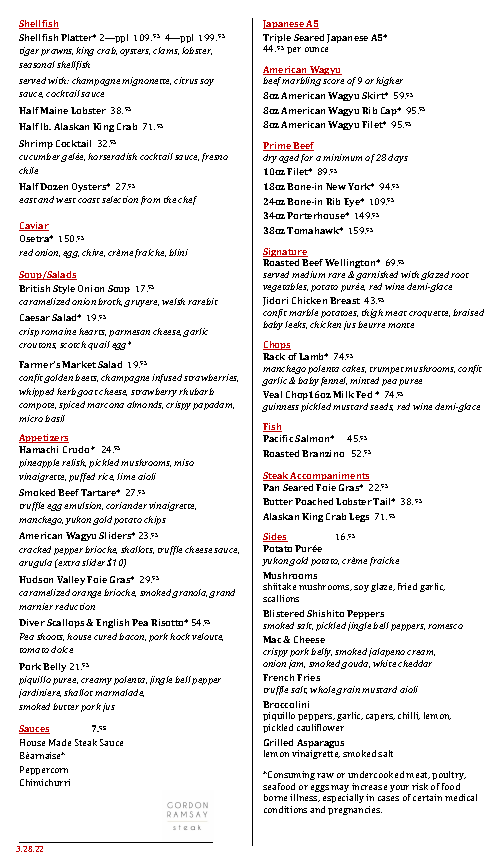

In [13]:
from PIL import Image, ImageTk

image=PageRenderer().render_page(page)

pil_image = Image.frombytes(
    "RGBA",
    (image.width, image.height),
    image.data,
    "raw",
    str(image.format),
 )
pil_image

In [14]:
help(page.text_list()[0])

Help on TextBox in module poppler.page object:

class TextBox(builtins.object)
 |  TextBox(text_box)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, text_box)
 |  
 |  char_bbox(self, i)
 |  
 |  get_font_name(self, i=0)
 |  
 |  get_font_size(self)
 |  
 |  get_wmode(self, i=0)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  bbox
 |  
 |  has_font_info
 |  
 |  has_space_after
 |  
 |  rotation
 |  
 |  text
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  WritingMode = <class 'poppler.cpp.page.writing_mode_enum'>



In [29]:
help(page.text_list()[0].bbox)

Help on Rectangle in module poppler.rectangle object:

class Rectangle(builtins.object)
 |  Rectangle(x=0, y=0, w=0, h=0, poppler_object=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x=0, y=0, w=0, h=0, poppler_object=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  as_tuple(self)
 |  
 |  is_empty(self)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  from_object(poppler_object) from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  height
 |  
 |  width
 |  
 |  x
 |  
 |  y
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  bottom
 |  
 |  left
 |  


In [15]:
#Playing around with Poppler output formats. This would be great on a no GUI machine with just command line
print(page.text(layout_mode=poppler.TextLayout.physical_layout))

Shellfish                                                 Japanese A5
Shellfish Platter* 2—ppl 109. 95 4—ppl 199. 95            Triple Seared Japanese A5*
tiger prawns, king crab, oysters, clams, lobster,         44. 95 per ounce
seasonal shellfish
                                                          American Wagyu
served with: champagne mignonette, citrus soy             beef marbling score of 9 or higher
sauce, cocktail sauce                                     8oz American Wagyu Skirt* 59.95
Half Maine Lobster 38. 95                                 8oz American Wagyu Rib Cap* 95.95
Half lb. Alaskan King Crab 71. 95                         8oz American Wagyu Filet* 95.95
Shrimp Cocktail 32.95                                     Prime Beef
cucumber gelée, horseradish cocktail sauce, fresno        dry aged for a minimum of 28 days
chile                                                     10oz Filet* 89.95
Half Dozen Oysters* 27.95                                 18oz Bone-in New Y

In [16]:
#Converts pixels into numpy array for easier algorithms and manipulation
def pil_to_numpy(im):
    im.load()
    # unpack data
    e = Image._getencoder(im.mode, 'raw', im.mode)
    e.setimage(im.im)

    # NumPy buffer for the result
    shape, typestr = Image._conv_type_shape(im)
    data = np.empty(shape, dtype=np.dtype(typestr))
    mem = data.data.cast('B', (data.data.nbytes,))

    bufsize, s, offset = 65536, 0, 0
    while not s:
        l, s, d = e.encode(bufsize)
        mem[offset:offset + len(d)] = d
        offset += len(d)
    if s < 0:
        raise RuntimeError("encoder error %d in tobytes" % s)
    return data

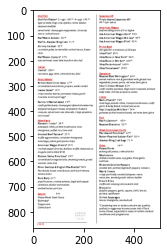

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
image=pil_to_numpy(pil_image)
plt.imshow(image)

In [19]:
np.shape(image)

(864, 504, 4)

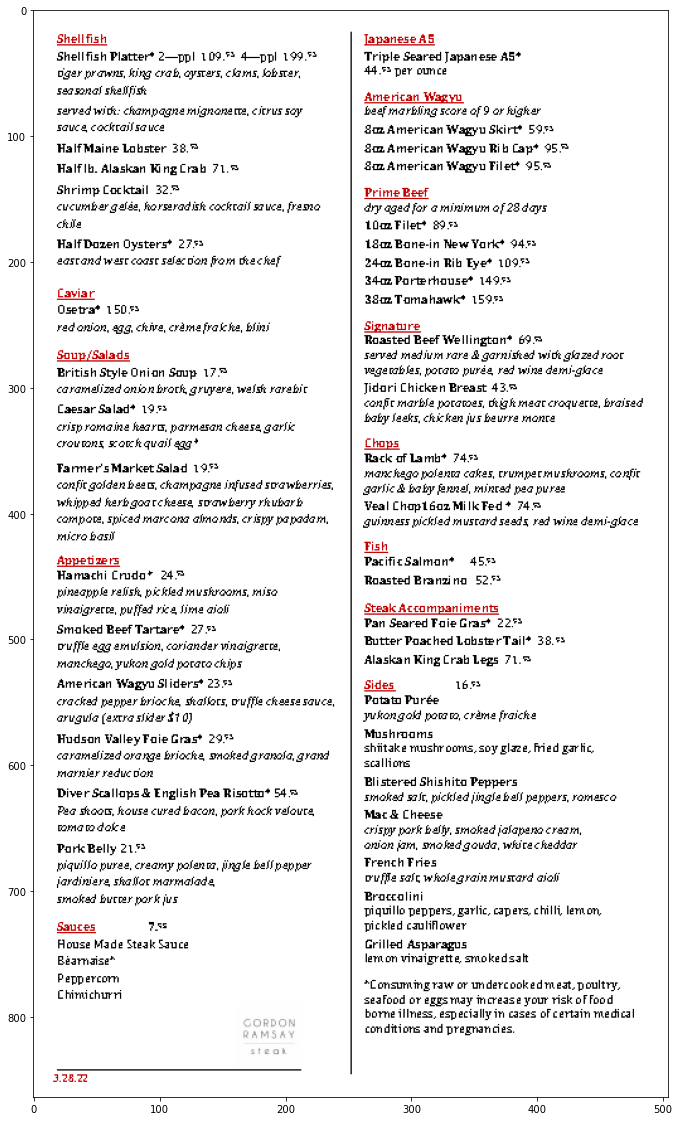

In [20]:
#That's a little small, let's change scaling
def draw_image(image):
    plt.figure(figsize = (35,20))
    plt.imshow(image)#, interpolation='nearest', aspect='auto')
draw_image(image)

In [22]:
texts=[]
for text in page.text_list(page.TextListOption.text_list_include_font):
    texts.append({
        "size": text.get_font_size(),
        "font": text.get_font_name(),
        "text": text.text,
        "x": text.bbox.x,
        "y": text.bbox.y,
        "h": text.bbox.height,
        "w": text.bbox.width,
        "h": text.bbox.height,
        "w": text.bbox.width,
        "top": text.bbox.top,
        "bottom": text.bbox.bottom,
        "left": text.bbox.left,
        "right": text.bbox.right,
        "is_bold": "bold" in text.get_font_name().lower(),
        "is_italics": "italic" in text.get_font_name().lower()
    })
text_df=pd.DataFrame(texts)
text_df

,size,font,text,x,y,h,w,top,bottom,left,right,is_bold,is_italics
0,10.08,AAAAAC+Cambria-Bold,Shellfish,19.439900,18.02400,11.81376,39.587184,18.02400,29.83776,19.439900,59.027084,True,False
1,10.08,AAAAAC+Cambria-Bold,Shellfish,19.439900,31.46400,11.81376,39.592224,31.46400,43.27776,19.439900,59.032124,True,False
2,10.08,AAAAAC+Cambria-Bold,Platter*,61.181180,31.46400,11.81376,36.365616,31.46400,43.27776,61.181180,97.546796,True,False
3,10.08,AAAAAE+Cambria,2—ppl,99.696860,31.46400,11.81376,29.387232,31.46400,43.27776,99.696860,129.084092,False,False
4,10.08,AAAAAE+Cambria,109.,133.474940,31.46400,11.81376,18.677232,31.46400,43.27776,133.474940,152.152172,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,10.08,AAAAAE+Cambria,certain,412.796640,792.28128,11.81376,30.088800,792.28128,804.09504,412.796640,442.885440,False,False
493,10.08,AAAAAE+Cambria,medical,445.052640,792.28128,11.81376,33.536160,792.28128,804.09504,445.052640,478.588800,False,False
494,10.08,AAAAAE+Cambria,conditions,263.259840,804.04464,11.81376,44.993088,804.04464,815.85840,263.259840,308.252928,False,False
495,10.08,AAAAAE+Cambria,and,310.418112,804.04464,11.81376,16.055424,804.04464,815.85840,310.418112,326.473536,False,False


In [24]:
menu_items=[]
for y,boxes in text_df[text_df['is_bold']].groupby("y"):
    if boxes['h'].max()>10:
        menu_items.append(" ".join([x for x in boxes['text']]))
menu_items

['Shellfish Japanese A5',
 'Shellfish Platter* Triple Seared Japanese A5*',
 'American Wagyu',
 '8oz American Wagyu Skirt*',
 'Half Maine Lobster',
 '8oz American Wagyu Rib Cap*',
 '8oz American Wagyu Filet*',
 'Half lb. Alaskan King Crab',
 'Shrimp Cocktail',
 'Prime Beef',
 '10oz Filet*',
 'Half Dozen Oysters*',
 '18oz Bone-in New York*',
 '24oz Bone-in Rib Eye*',
 '34oz Porterhouse*',
 'Caviar',
 '38oz Tomahawk*',
 'Osetra*',
 'Signature',
 'Roasted Beef Wellington*',
 'Soup/Salads',
 'British Style Onion Soup',
 'Jidori Chicken Breast',
 'Caesar Salad*',
 'Chops',
 'Rack of Lamb*',
 'Farmer’s Market Salad',
 'Veal Chop16oz Milk Fed *',
 'Fish',
 'Appetizers',
 'Pacific Salmon*',
 'Hamachi Crudo*',
 'Roasted Branzino',
 'Steak Accompaniments',
 'Pan Seared Foie Gras*',
 'Smoked Beef Tartare*',
 'Butter Poached Lobster Tail*',
 'Alaskan King Crab Legs',
 'American Wagyu Sliders*',
 'Sides',
 'Potato Purée',
 'Mushrooms',
 'Hudson Valley Foie Gras*',
 'Blistered Shishito Peppers',
 'D

# Let's Add Column Based Recognition
Not bad, we're missing sauces and descriptions though. Also some extra section names were included like "Appetizers". Unfortunately I can't find out how to get underlined text. I may need to contribute that to the package.  
  
We'll assume we'll have a ignored items list later on to handle easy things like Appetizers not counting.  
  
We can improve this further by using columns to group items.

In [25]:
num_columns=2
y,x,color=np.shape(image)
text_df['column']=np.digitize(text_df['x'],[(x-text_df['size'].mean()*2)/2])
text_df

,size,font,text,x,y,h,w,top,bottom,left,right,is_bold,is_italics,column
0,10.08,AAAAAC+Cambria-Bold,Shellfish,19.439900,18.02400,11.81376,39.587184,18.02400,29.83776,19.439900,59.027084,True,False,0
1,10.08,AAAAAC+Cambria-Bold,Shellfish,19.439900,31.46400,11.81376,39.592224,31.46400,43.27776,19.439900,59.032124,True,False,0
2,10.08,AAAAAC+Cambria-Bold,Platter*,61.181180,31.46400,11.81376,36.365616,31.46400,43.27776,61.181180,97.546796,True,False,0
3,10.08,AAAAAE+Cambria,2—ppl,99.696860,31.46400,11.81376,29.387232,31.46400,43.27776,99.696860,129.084092,False,False,0
4,10.08,AAAAAE+Cambria,109.,133.474940,31.46400,11.81376,18.677232,31.46400,43.27776,133.474940,152.152172,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,10.08,AAAAAE+Cambria,certain,412.796640,792.28128,11.81376,30.088800,792.28128,804.09504,412.796640,442.885440,False,False,1
493,10.08,AAAAAE+Cambria,medical,445.052640,792.28128,11.81376,33.536160,792.28128,804.09504,445.052640,478.588800,False,False,1
494,10.08,AAAAAE+Cambria,conditions,263.259840,804.04464,11.81376,44.993088,804.04464,815.85840,263.259840,308.252928,False,False,1
495,10.08,AAAAAE+Cambria,and,310.418112,804.04464,11.81376,16.055424,804.04464,815.85840,310.418112,326.473536,False,False,1


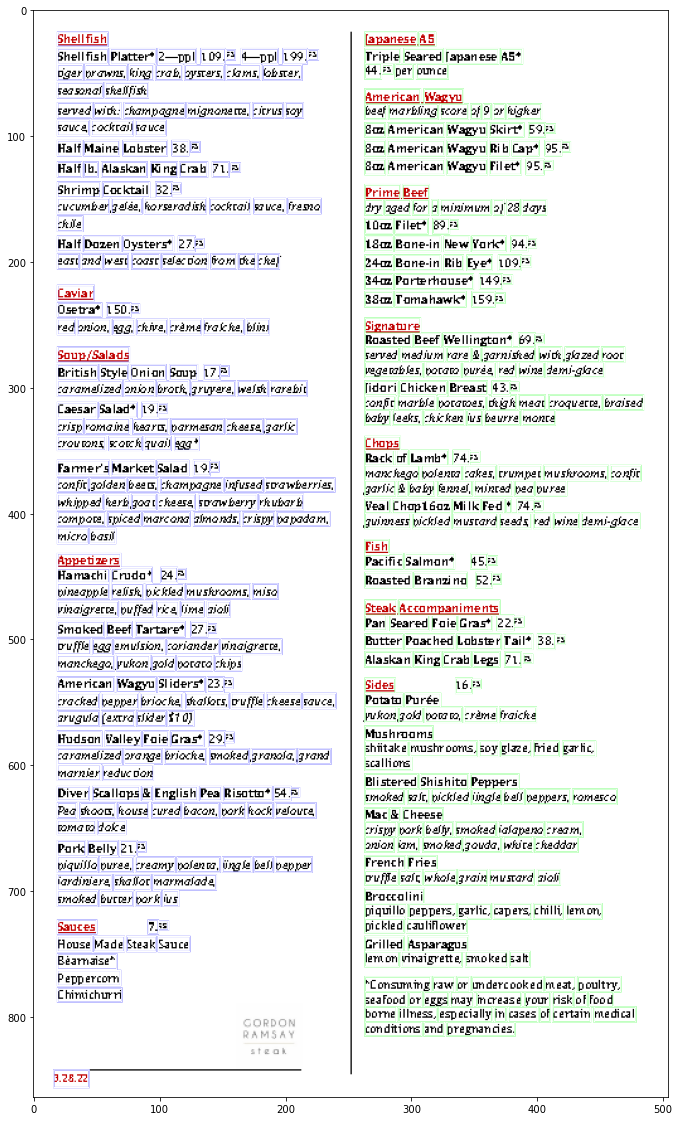

In [26]:
import cv2


colors=[(0,0,255),(0,255,0),(255,255,0)]
canvas=image.copy()
#Check our work
for idx, row in text_df.iterrows():
    start=(row['x'],row['y'])
    end=(row['x']+row['w'],row['y']+row['h'])
    color = colors[row['column']]
    cv2.rectangle(canvas, list(map(int,start)), list(map(int,end)), color, 1)
draw_image(canvas)

Column detection looks great! Now lets add that to the groupby

In [29]:
menu_items=[]
for y,boxes in text_df[text_df['is_bold']].groupby(["column","y"]):
    if boxes['h'].max()>10:
        menu_items.append(" ".join([x for x in boxes['text']]))
menu_items

['Shellfish',
 'Shellfish Platter*',
 'Half Maine Lobster',
 'Half lb. Alaskan King Crab',
 'Shrimp Cocktail',
 'Half Dozen Oysters*',
 'Caviar',
 'Osetra*',
 'Soup/Salads',
 'British Style Onion Soup',
 'Caesar Salad*',
 'Farmer’s Market Salad',
 'Appetizers',
 'Hamachi Crudo*',
 'Smoked Beef Tartare*',
 'American Wagyu Sliders*',
 'Hudson Valley Foie Gras*',
 'Diver Scallops & English Pea Risotto*',
 'Pork Belly',
 'Sauces 7.',
 'Japanese A5',
 'Triple Seared Japanese A5*',
 'American Wagyu',
 '8oz American Wagyu Skirt*',
 '8oz American Wagyu Rib Cap*',
 '8oz American Wagyu Filet*',
 'Prime Beef',
 '10oz Filet*',
 '18oz Bone-in New York*',
 '24oz Bone-in Rib Eye*',
 '34oz Porterhouse*',
 '38oz Tomahawk*',
 'Signature',
 'Roasted Beef Wellington*',
 'Jidori Chicken Breast',
 'Chops',
 'Rack of Lamb*',
 'Veal Chop16oz Milk Fed *',
 'Fish',
 'Pacific Salmon*',
 'Roasted Branzino',
 'Steak Accompaniments',
 'Pan Seared Foie Gras*',
 'Butter Poached Lobster Tail*',
 'Alaskan King Crab Leg

## Prices
Those menu items look mostly good. Lets try to attach prices to it.   
  
We're going to use a basic geometry library called [Shapely](https://shapely.readthedocs.io/en/stable/project.html) to find the price to the right of the bolded text.

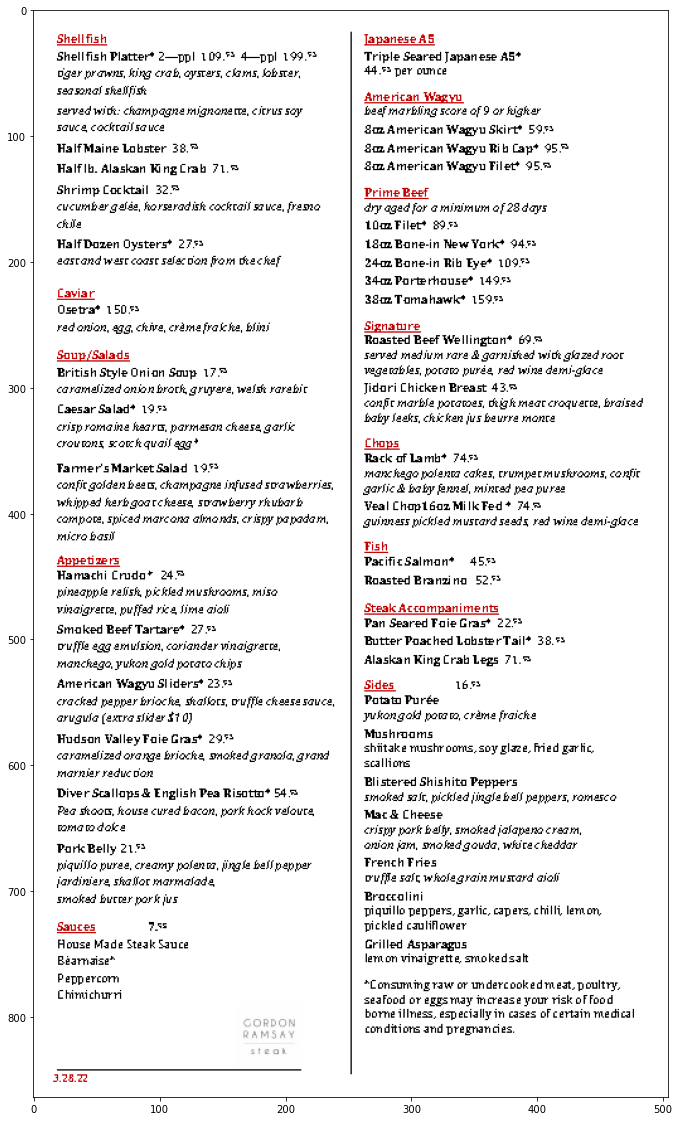

In [30]:
draw_image(image)

In [55]:
from shapely.geometry import box
from shapely.ops import * 
from shapely.affinity import *

def row_to_bbox(row):
    return box(row['left'],row['top'],row['right'],row['bottom'])
text_df['bbox']=text_df.apply(lambda row: row_to_bbox(row), axis=1)#Shapely box object

import re

text_df['is_number']=text_df['text'].apply(lambda x: bool(re.match("^[\d\.]+$", x)))

prices=text_df.loc[text_df["is_number"]].copy()
prices

,size,font,text,x,y,h,w,top,bottom,left,right,is_bold,is_italics,column,bbox,is_number
4,10.08,AAAAAE+Cambria,109.,133.47494,31.46400,11.81376,18.677232,31.46400,43.27776,133.47494,152.152172,False,False,0,"POLYGON ((152.152172 31.46400000000008, 152.15...",True
5,6.48,AAAAAG+Cambria,95,153.57218,32.48400,7.59456,7.188912,32.48400,40.07856,153.57218,160.761092,False,False,0,"POLYGON ((160.761092 32.4840000000001, 160.761...",True
7,10.08,AAAAAE+Cambria,199.,198.84208,31.46400,11.81376,18.677232,31.46400,43.27776,198.84208,217.519312,False,False,0,"POLYGON ((217.519312 31.46400000000008, 217.51...",True
8,6.48,AAAAAG+Cambria,95,218.93748,32.48400,7.59456,7.188912,32.48400,40.07856,218.93748,226.126392,False,False,0,"POLYGON ((226.126392 32.4840000000001, 226.126...",True
30,10.08,AAAAAE+Cambria,38.,110.73916,104.65488,11.81376,13.140288,104.65488,116.46864,110.73916,123.879448,False,False,0,"POLYGON ((123.879448 104.6548800000001, 123.87...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,6.48,AAAAAG+Cambria,95,415.44938,497.36400,7.59456,7.188912,497.36400,504.95856,415.44938,422.638292,False,False,1,"POLYGON ((422.638292 497.364, 422.638292 504.9...",True
403,10.08,AAAAAE+Cambria,71.,374.55312,510.98400,11.81376,13.140288,510.98400,522.79776,374.55312,387.693408,False,False,1,"POLYGON ((387.6934079999999 510.9839999999999,...",True
404,6.48,AAAAAG+Cambria,95,389.10668,512.00400,7.59456,7.188912,512.00400,519.59856,389.10668,396.295592,False,False,1,"POLYGON ((396.2955920000001 512.004, 396.29559...",True
406,10.08,AAAAAE+Cambria,16.,335.27136,531.38400,11.81376,13.134240,531.38400,543.19776,335.27136,348.405600,False,False,1,"POLYGON ((348.4056 531.384, 348.4056 543.19776...",True


In [56]:
pd.options.display.max_rows=99
prices

,size,font,text,x,y,h,w,top,bottom,left,right,is_bold,is_italics,column,bbox,is_number
4,10.08,AAAAAE+Cambria,109.,133.474940,31.46400,11.81376,18.677232,31.46400,43.27776,133.474940,152.152172,False,False,0,"POLYGON ((152.152172 31.46400000000008, 152.15...",True
5,6.48,AAAAAG+Cambria,95,153.572180,32.48400,7.59456,7.188912,32.48400,40.07856,153.572180,160.761092,False,False,0,"POLYGON ((160.761092 32.4840000000001, 160.761...",True
7,10.08,AAAAAE+Cambria,199.,198.842080,31.46400,11.81376,18.677232,31.46400,43.27776,198.842080,217.519312,False,False,0,"POLYGON ((217.519312 31.46400000000008, 217.51...",True
8,6.48,AAAAAG+Cambria,95,218.937480,32.48400,7.59456,7.188912,32.48400,40.07856,218.937480,226.126392,False,False,0,"POLYGON ((226.126392 32.4840000000001, 226.126...",True
30,10.08,AAAAAE+Cambria,38.,110.739160,104.65488,11.81376,13.140288,104.65488,116.46864,110.739160,123.879448,False,False,0,"POLYGON ((123.879448 104.6548800000001, 123.87...",True
31,6.48,AAAAAG+Cambria,95,125.295880,105.68400,7.59456,7.188912,105.68400,113.27856,125.295880,132.484792,False,False,0,"POLYGON ((132.484792 105.684, 132.484792 113.2...",True
37,10.08,AAAAAE+Cambria,71.,142.526780,121.22400,11.81376,13.140288,121.22400,133.03776,142.526780,155.667068,False,False,0,"POLYGON ((155.667068 121.224, 155.667068 133.0...",True
38,6.48,AAAAAG+Cambria,95,157.087880,122.24400,7.59456,7.188912,122.24400,129.83856,157.087880,164.276792,False,False,0,"POLYGON ((164.276792 122.244, 164.276792 129.8...",True
41,10.08,AAAAAE+Cambria,32.,97.035740,137.54400,11.81376,13.140288,137.54400,149.35776,97.035740,110.176028,False,False,0,"POLYGON ((110.176028 137.5440000000001, 110.17...",True
42,6.48,AAAAAG+Cambria,95,110.162600,138.56400,7.59456,7.188912,138.56400,146.15856,110.162600,117.351512,False,False,0,"POLYGON ((117.351512 138.5639999999999, 117.35...",True


In [ ]:
prices

In [72]:
number_box
number_box

AttributeError: 'MultiPolygon' object has no attribute 'update'

In [94]:
#Same as before but with number code
#FIXED POST VIDEO -- just needed to change translate to extend the width not move the box over
menu_items=[]
for (column,y),boxes in text_df[(text_df['is_bold'])&~(text_df['is_number'])].groupby(["column","y"]):
    d={}
    text_boxes=[]
    if boxes['h'].max()>10:
        d={"item_text": " ".join([x for x in boxes['text']])}
        for idx, row in boxes.iterrows():
            text_boxes.append(row['bbox'])
        menu_items.append(d)
    if menu_items:
        #New!
        text_bbox=cascaded_union(text_boxes)
        
        #Make the rect wider
        #Since we have column detection we should be able to make this absurdly large without any issue. 
        #We'll just match with prices from the same column
        number_box=translate(text_bbox, xoff=boxes['size'].mean()*7)
        number_box=box(text_bbox.bounds[0],number_box.bounds[1], number_box.bounds[2],number_box.bounds[3])
        
        
        #shrinking vertically helps us ignore font issues where a y stretches too far down from above
        number_box=scale(number_box, yfact=.8)
        prices['intersects']=prices['bbox'].apply(lambda x: x.intersects(number_box))
        d['price']="".join(prices[(prices['column']==column)&(prices['intersects'])]['text'].values)
        try:
            if d['price']:
                d['price']=float(d['price'])
        except:
            print("err converting",d)
menu_items=pd.DataFrame(menu_items)
menu_items

,item_text,price
0,Shellfish,
1,Shellfish Platter*,109.95
2,Half Maine Lobster,38.95
3,Half lb. Alaskan King Crab,71.95
4,Shrimp Cocktail,32.95
5,Half Dozen Oysters*,27.95
6,Caviar,
7,Osetra*,150.95
8,Soup/Salads,
9,British Style Onion Soup,17.95


Looks good to me. Sides and the platter are tricky but the rest look good

# Add in descriptions
They are all in italics so this should be straightforward. For each description we'll match it to the nearest menu item above it

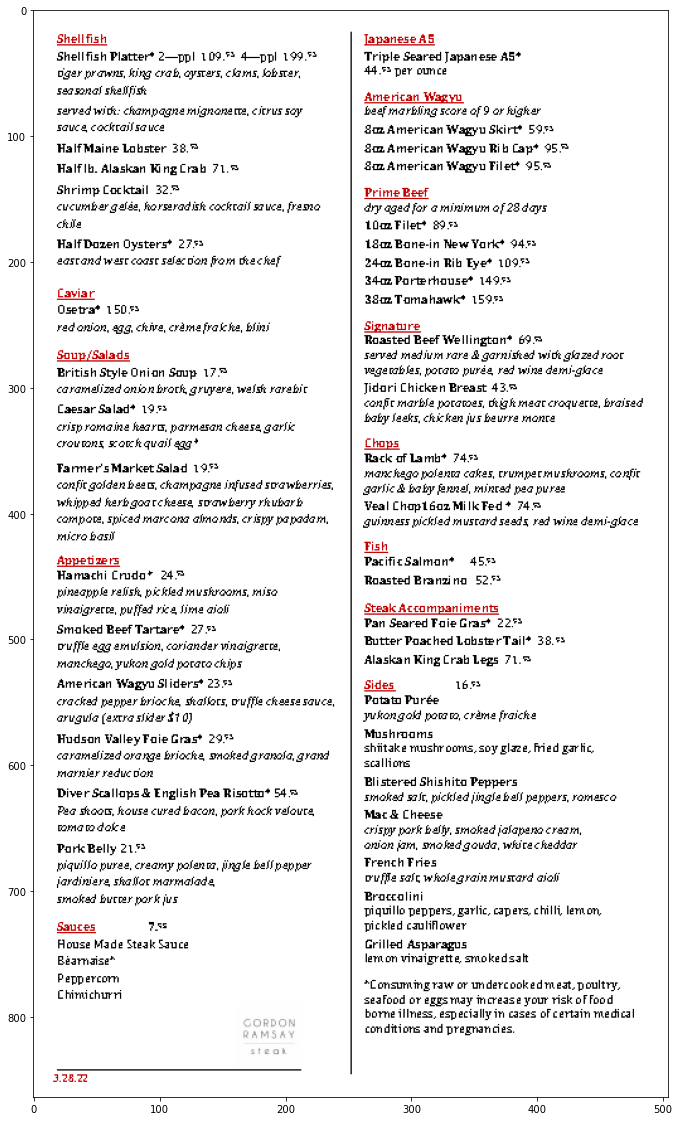

In [89]:
draw_image(image)

In [90]:
descriptions=text_df[text_df['is_italics']].copy()
descriptions

,size,font,text,x,y,h,w,top,bottom,left,right,is_bold,is_italics,column,bbox,is_number
9,10.08,AAAAAI+Cambria-Italic,tiger,19.44460,44.90064,11.81376,20.05920,44.90064,56.7144,19.44460,39.50380,False,True,0,"POLYGON ((39.50380000000001 44.90064000000009,...",False
10,10.08,AAAAAI+Cambria-Italic,"prawns,",41.67100,44.90064,11.81376,33.03216,44.90064,56.7144,41.67100,74.70316,False,True,0,"POLYGON ((74.70316000000001 44.90064000000009,...",False
11,10.08,AAAAAI+Cambria-Italic,king,76.89052,44.90064,11.81376,18.29016,44.90064,56.7144,76.89052,95.18068,False,True,0,"POLYGON ((95.18068000000001 44.90064000000009,...",False
12,10.08,AAAAAI+Cambria-Italic,"crab,",97.34788,44.90064,11.81376,20.86560,44.90064,56.7144,97.34788,118.21348,False,True,0,"POLYGON ((118.21348 44.90064000000009, 118.213...",False
13,10.08,AAAAAI+Cambria-Italic,"oysters,",120.40084,44.90064,11.81376,31.39416,44.90064,56.7144,120.40084,151.79500,False,True,0,"POLYGON ((151.795 44.90064000000009, 151.795 5...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,10.08,AAAAAI+Cambria-Italic,"salt,",291.42336,683.79024,11.81376,17.21664,683.79024,695.6040,291.42336,308.64000,False,True,1,"POLYGON ((308.6399999999999 683.79024, 308.639...",False
452,10.08,AAAAAI+Cambria-Italic,whole,310.83744,683.79024,11.81376,24.92784,683.79024,695.6040,310.83744,335.76528,False,True,1,"POLYGON ((335.7652799999998 683.79024, 335.765...",False
453,10.08,AAAAAI+Cambria-Italic,grain,337.93248,683.79024,11.81376,22.65984,683.79024,695.6040,337.93248,360.59232,False,True,1,"POLYGON ((360.5923199999997 683.79024, 360.592...",False
454,10.08,AAAAAI+Cambria-Italic,mustard,362.75952,683.79024,11.81376,35.22960,683.79024,695.6040,362.75952,397.98912,False,True,1,"POLYGON ((397.9891199999996 683.79024, 397.989...",False


In [95]:
#same as before but with bottom and column added as outputs we'll use later

menu_items=[]
for (column,y),boxes in text_df[(text_df['is_bold'])&~(text_df['is_number'])].groupby(["column","y"]):
    d={}
    text_boxes=[]
    if boxes['h'].max()>10:
        d={"item_text": " ".join([x for x in boxes['text']]),"bottom": boxes['bottom'].max()-5,"column": column}
        for idx, row in boxes.iterrows():
            text_boxes.append(row['bbox'])
        menu_items.append(d)
    if menu_items:
        text_bbox=cascaded_union(text_boxes)
        
        #Make the rect wider
        #Since we have column detection we should be able to make this absurdly large without any issue. 
        #We'll just match with prices from the same column
        number_box=translate(text_bbox, xoff=boxes['size'].mean()*7)
        number_box=box(text_bbox.bounds[0],number_box.bounds[1], number_box.bounds[2],number_box.bounds[3])
        
        
        #shrinking vertically helps us ignore font issues where a y stretches too far down from above
        number_box=scale(number_box, yfact=.8)
        prices['intersects']=prices['bbox'].apply(lambda x: x.intersects(number_box))
        d['price']="".join(prices[(prices['column']==column)&(prices['intersects'])]['text'].values)
        try:
            if d['price']:
                d['price']=float(d['price'])
        except:
            print("err converting",d)
            
menu_items=pd.DataFrame(menu_items)
menu_items

,item_text,bottom,column,price
0,Shellfish,24.83776,0,
1,Shellfish Platter*,38.27776,0,109.95
2,Half Maine Lobster,111.46864,0,38.95
3,Half lb. Alaskan King Crab,128.03776,0,71.95
4,Shrimp Cocktail,144.35776,0,32.95
5,Half Dozen Oysters*,187.79248,0,27.95
6,Caviar,226.43440,0,
7,Osetra*,239.87776,0,150.95
8,Soup/Salads,275.63152,0,
9,British Style Onion Soup,289.31776,0,17.95


In [96]:
#Now lets match each item to it's parent menu item. 
#This is per column and the sort is already a natural sort that reads left to right properly from Poppler. 
item_ids=[]
for idx, desc in descriptions.iterrows():
    same_column_items=menu_items[menu_items['column']==desc['column']]
    diffs=desc['y']-same_column_items['bottom']
    pos_diffs=[(same_column_items.index[menu_index], x) for menu_index,x in enumerate(diffs) if x>0]
    item_ids.append(min(pos_diffs, key=lambda x: x[1])[0]) 
descriptions['item_id']=item_ids

grouped_descriptions=[]
for id, descs in descriptions.groupby("item_id"):
    d={
        "index": id,
        "description": " ".join(descs['text'].values)
    }
    grouped_descriptions.append(d)
grouped_descriptions=pd.DataFrame(grouped_descriptions).set_index("index")
grouped_descriptions

,description
index,
1,"tiger prawns, king crab, oysters, clams, lobst..."
4,"cucumber gelée, horseradish cocktail sauce, fr..."
5,east and west coast selection from the chef
7,"red onion, egg, chive, crème fraîche, blini"
9,"caramelized onion broth, gruyere, welsh rarebit"
10,"crisp romaine hearts, parmesan cheese, garlic ..."
11,"confit golden beets, champagne infused strawbe..."
13,"pineapple relish, pickled mushrooms, miso vina..."
14,"truffle egg emulsion, coriander vinaigrette, m..."


In [97]:
#Looks good, let's now add back into menu_items
menu_df=menu_items.join(grouped_descriptions)
menu_df

,item_text,bottom,column,price,description
0,Shellfish,24.83776,0,,NaN
1,Shellfish Platter*,38.27776,0,109.95,"tiger prawns, king crab, oysters, clams, lobst..."
2,Half Maine Lobster,111.46864,0,38.95,NaN
3,Half lb. Alaskan King Crab,128.03776,0,71.95,NaN
4,Shrimp Cocktail,144.35776,0,32.95,"cucumber gelée, horseradish cocktail sauce, fr..."
5,Half Dozen Oysters*,187.79248,0,27.95,east and west coast selection from the chef
6,Caviar,226.43440,0,,NaN
7,Osetra*,239.87776,0,150.95,"red onion, egg, chive, crème fraîche, blini"
8,Soup/Salads,275.63152,0,,NaN
9,British Style Onion Soup,289.31776,0,17.95,"caramelized onion broth, gruyere, welsh rarebit"


# Good Enough
Whew, that was a bit hard. Special items like how the shellfish platter has 2--ppl or 4--ppl laid out like that are tricky. And because we weren't able to identify underlined text or color somet things are extra hard.  
  
Rather than try to solve all this now I would recommend moving forward to getting more examples. Also, any mass data intake system like the menu spider scraper should have some form of human in the loop (HITL) reviewing that can help us on the trickier edge cases until we really get going. We can simplify the problem by showing a reviewer a single menu item and the surrounding text as a picture (using the cascaded union bounding boxes + some offset).   
  
Amazon Mechanical Turk, Textract, and the Microsoft Read API all offer various solutions here. 
  
Onwards and upwards I say! Don't let tricky edge cases keep you in the weeds on a project. Celebrate the success of all the items the computer helped us grab more effectively (most things with a price came out great!)

As an exercise try to scrape the Dessert menu http://marketeammenuparisgordonramsaysteak.com/GDSteak_dessert.pdf It's far simpler than the main menu.   
  
The more examples we get the better we can learn to abstract our menu parser template. Columns already seems important (Dessert is 1 column whereas the dinner menu is 2)

In [98]:
#Uncomment below to save it
#menu_df.to_csv("data/pdf_menu_scrape_example.csv",index=False)